# AB - Module 4

Давайте практиковаться в применении статистических критериев.

Представим, что у нас был процесс обзвона клиентов с предложением продлить подписку на наше приложение. Вероятность успеха составляла p=0.1 (каждый десятый звонок заканчивался продлением подписки).

Мы сделали новый алгоритм подбора клиентов для обзвона. Из 1000 тестовых звонков 113 закончились успешно.

Мы хотим проверить, значимо ли это отклонение от бейзлайна в 10%. Посчитайте p-value для нулевой гипотезы о равенстве доли p=0.1, альтернатива двусторонняя. Попробуйте сделать это вручную, без использования готовых библиотек (то есть используем модули про распределения, но не готовый статистический критерий). Учтите, что каждый звонок — распределение Бернулли и всё можно сделать точно и без использования центральной предельной теоремы.

Будьте осторожны — если вы будете вспоминать, как мы это делали на уроке, то осторожней с тем, какие квантили вы считаете (левый или правый хвост экстремальных значений). Для удобства можно визуализировать.

В конце попробуйте воспользоваться библиотечной версией и сравните результаты. Они должны получиться похожими, выбирайте библиотечную версию. В разборе домашнего задания будем изучать, в чём разница.

In [3]:
N = 1000
x = 113 
p0 = 0.1

In [24]:
from scipy.stats import binom, binomtest, norm, t

In [9]:
binom(N, p0).cdf([87, 113])

array([0.09192916, 0.92070124])

In [13]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(x, N, alpha=0.05, method='normal')

(0.09337773562870501, 0.132622264371295)

In [8]:
binom.cdf(x, N, p0)

0.9207012361232481

In [11]:
binomtest(x, N, p0, 'two-sided')


BinomTestResult(k=113, n=1000, alternative='two-sided', statistic=0.113, pvalue=0.17051384223689403)

In [15]:
# применим z-критерий
import numpy as np

p = x / N
z_n = (p-p0) / np.sqrt(p0 * (1 - p0) / N)

In [21]:
# p-value
2 * (1 - norm(loc=0, scale=1).cdf(np.abs(z_n)))

0.17058693287144155

Теперь попробуем применить вручную t-критерий Стьюдента.

Представим, что мы проверяем, изменилась ли средняя температура в нашем городе. Мы провели 100 замеров в разное время суток и разных местах, получили среднее значение, равное 18.1 градусам, среднеквадратичное отклонение, оценённое по выборке, 8.2 градуса. Хотим проверить, изменилась ли средняя температура, если ранее она составляла 16.5 градусов.

Посчитайте p-value для t-критерия Стьюдента, альтернатива двусторонняя.


In [25]:
N = 100
X = 18.1
mu = 16.5
sigma = 8.2

In [26]:
t_n = (X - mu) / sigma * np.sqrt(N)

In [33]:
# p-value
2 * (1 - t(df=N-1).cdf(np.abs(t_n)))


0.05385741608695005

Вернёмся к датасету (`fetch_california_housing`) со средними ценами на дома, с которым мы работали на прошлых уроках.

```python
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 
```


Давайте оценим, отличаются ли средние доходы в тех районах, где дома моложе 30 лет и старше 30 лет. Мы уже изучали способы анализа взаимосвязи через коэффициенты корреляции, а теперь попробуем воспользоваться механизмом статистических критериев и проверить, совпадают ли средние.

Какой тест здесь наиболее корректно применять?

In [34]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1]

In [35]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
first_sample = df[df['HouseAge'] > 30]['MedInc']
second_sample = df[df['HouseAge'] < 30]['MedInc']


Воспользуемся t-критерием Стьюдента для независимых выборок, чтобы сравнить средние значения доходов на равенство между районами с возрастом до 30 (включительно) и более 30, альтернатива двусторонняя.

Какое значение p-value вы получили? Можно ли говорить, что средние доходы различаются?

Внимательнее посмотрите на аргументы используемой функции, среди них есть флаг равенства дисперсий в выборках. Мы как раз не можем быть уверены, что дисперсии доходов одинаковые между выборками.

In [39]:
t_n = (first_sample.mean() - second_sample.mean()) / (first_sample.std() ** 2 / len(first_sample) + second_sample.std() ** 2 / len(second_sample))

2 * (1 - t(df=N-1).cdf(np.abs(t_n)))


0.0

Давайте проверим, а с какими данными мы работаем.  Хорошо бы делать это до применения критериев!

Во-первых, давайте посмотрим на гистограмму распределения.

Во-вторых, попробуйте построить `qq-plot` для наших выборок, оцените нормальность. Воспользуйтесь также тестом Шапиро-Уилка.

Что вы можете сказать?

Внимание, `sm.qqplot` не приводит вашу выборку к стандартной нормальной. Вам нужно самим нормализовать выборку так, чтобы среднее было нулевым, а дисперсия единичной. Тогда график будет информативным и можно будет сравнивать с диагональным.


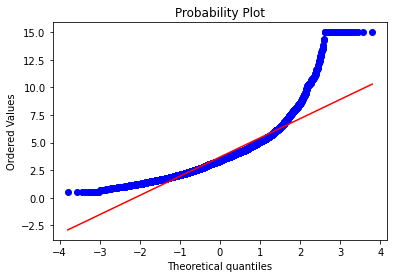

In [60]:
import pylab
import scipy.stats as stats

stats.probplot(first_sample, dist="norm", plot=pylab)

pylab.show()


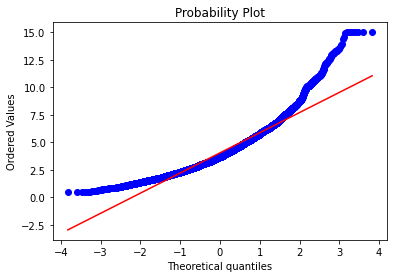

In [51]:
stats.probplot(second_sample, dist="norm", plot=pylab)

pylab.show()


In [48]:
stats.shapiro(first_sample)


C:\Users\Gavlique\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8525028228759766, pvalue=0.0)

In [49]:
stats.shapiro(second_sample)


ShapiroResult(statistic=0.9230856895446777, pvalue=0.0)

In [52]:
first_log = first_sample.apply(np.log)
second_log = second_sample.apply(np.log)

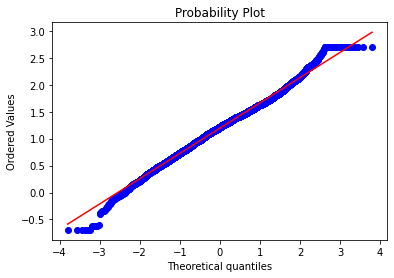

In [53]:
stats.probplot(first_log, dist="norm", plot=pylab)

pylab.show()


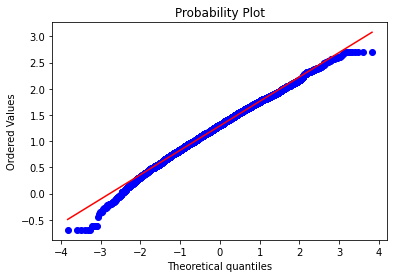

In [54]:
stats.probplot(second_log, dist="norm", plot=pylab)

pylab.show()


In [55]:
stats.shapiro(first_log)


C:\Users\Gavlique\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9950178265571594, pvalue=1.2855179158100876e-17)

In [56]:
stats.shapiro(second_log)

ShapiroResult(statistic=0.9959601163864136, pvalue=1.216053968033069e-16)